## Линейные модели и честный ML-эксперимент (логистическая регрессия, бейзлайн, метрики)

### 1. Загрузка датасета и первичный анализ данных

In [731]:
# Для работы с данными
import pandas as pd
# Для графиков
import matplotlib.pyplot as plt
# Библиотека sklearn
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# Метрики
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    average_precision_score
)


RANDOM_STATE = 42
MAX_ITER = 1000
C_VALUES = [0.01, 0.1, 1.0, 10.0]

Импортируем датасет

In [732]:
data = pd.read_csv("S05-hw-dataset.csv")
data.head()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


Выведем информацию о датасете

In [733]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

Выведем описательную статистику столбцов датасета

In [734]:
data.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


Посмотрим на распределение целевого признака в процентах

In [735]:
data["default"].value_counts(normalize=True)

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

#### Вывод 1. Загрузка данных и первичный анализ

- Датасет содержит **3000 объектов** и **17 столбцов** (включая `client_id` и таргет `default`).
- Пропусков в данных **нет** (по `info()` все столбцы заполнены).
- Все признаки числовые (`int64`/`float64`), поэтому для базового эксперимента не требуется one-hot кодирование.
- Распределение таргета `default` умеренно несбалансировано: примерно **~59% класс 0** и **~41% класс 1**.

Вывод: датасет готов к обучению простой модели классификации.

### 2. Подготовка признаков и таргета

Выделим матрицу признаков `X` и вектор таргета `y`. 
Под признаками примем матрицу без вектора таргета и идентификатора клиента `client_id` 

In [736]:
y = data["default"]
X = data.drop(columns=["default","client_id"])
print("матрица признаков X:")
display(X.head())
print("целевой признак y:")
display(y.head())

матрица признаков X:


,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years
0,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8
1,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7
2,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5
3,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7
4,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10


целевой признак y:


0    0
1    0
2    0
3    1
4    1
Name: default, dtype: int64

Выполним проверку, все ли признаки числовые - для этого посмотрим на уникальные типы данных. Если будет только `int`, `float` - все хорошо

In [737]:
print(X.dtypes.unique())

[dtype('int64') dtype('float64')]


### 3.Train/Test-сплит и бейзлайн-модель

Разделим данные на две выборки - обучающую и тестовую

In [738]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)
print(f"Размер обучающей выборки: {X_train.shape[0]} объектов")
print(f"Размер тестовой выборки: {X_test.shape[0]} объектов")

Размер обучающей выборки: 2400 объектов
Размер тестовой выборки: 600 объектов


Построим **baseline-модель** на основе `DummyClassifier`, используя стратегию `"most frequent"` и обучим ее на выборке `X_train` 

In [739]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)
pass


После обучения проверим ее 

'Метрики для DummyClassifier:'

'Accuracy: 0.590'

'Precision: 0.000'

'Recall: 0.000'

'F1-score: 0.000'

'ROC AUC: 0.500'

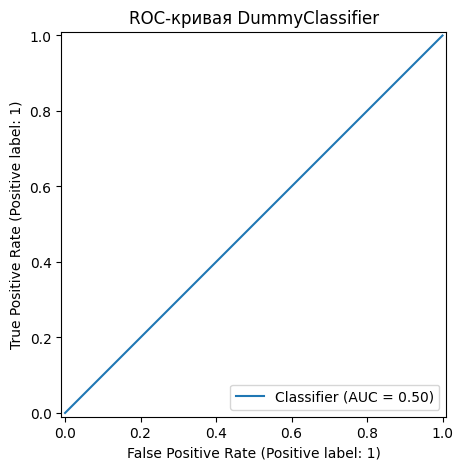

In [740]:
y_pred_dummy = dummy.predict(X_test)
y_proba_dummy = dummy.predict_proba(X_test)[:, 1]

display("Метрики для DummyClassifier:")
display(f"Accuracy: {accuracy_score(y_test, y_pred_dummy):.3f}")
display(f"Precision: {precision_score(y_test, y_pred_dummy, zero_division=0.0):.3f}")
display(f"Recall: {recall_score(y_test, y_pred_dummy, zero_division=0.0):.3f}")
display(f"F1-score: {f1_score(y_test, y_pred_dummy, zero_division=0.0):.3f}")
display(f"ROC AUC: {roc_auc_score(y_test, y_proba_dummy):.3f}")

fig, ax = plt.subplots( figsize=(18, 5))
RocCurveDisplay.from_predictions(y_test, y_proba_dummy, ax=ax)
plt.title("ROC-кривая DummyClassifier")
plt.show()
fig.savefig("./figures/roc_curve_dummy.png")


### Оценка качества DummyClassifier

В качестве бейзлайн-модели был использован `DummyClassifier` со стратегией `most_frequent`, который всегда предсказывает наиболее частый класс.

Значение **accuracy** в этом случае близко к доле самого частого класса в выборке, поскольку модель не использует признаки и не обучается на данных.

Метрики **precision**, **recall** и **F1-score** для положительного класса оказались равны нулю. Это связано с тем, что модель ни разу не предсказывает класс `1`, а все объекты положительного класса классифицируются неверно.

Метрика **ROC-AUC** принимает значение, близкое к `0.5`, что соответствует случайному классификатору. Построенная ROC-кривая совпадает с диагональю.

`DummyClassifier` не способен различать классы и используется исключительно как точка отсчёта для сравнения с более осмысленными моделями.

### 4. Логистическая регрессия и подбор гиперпараметров

In [741]:
pipe = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("logreg", LogisticRegression(random_state=RANDOM_STATE, max_iter=MAX_ITER, solver="liblinear")),
    ]
)

### Гиперпараметр C в логистической регрессии

Параметр `C` в логистической регрессии отвечает за **силу регуляризации** модели.

- Малые значения `C` означают **сильную регуляризацию**: модель сильнее штрафует большие веса, становится проще и менее склонной к переобучению.
- Большие значения `C` соответствуют **слабой регуляризации**: модель получает больше свободы и лучше подстраивается под обучающие данные, но может переобучаться.

Методом перебора подберем этот параметр

In [742]:
results = []  # список для хранения результатов подбора

for C in C_VALUES:
    current_model = pipe.set_params(logreg__C=C)  # Устанавливаем гиперпараметр
    current_model.fit(X_train, y_train)  # Обучаем на обучающих данных

    y_pred_current= current_model.predict(X_test)
    y_proba_current = current_model.predict_proba(X_test)[:, 1]

    # Вычисляем метрики
    accuracy = accuracy_score(y_test, y_pred_current)
    precision = precision_score(y_test, y_pred_current, zero_division=0.0)
    recall = recall_score(y_test, y_pred_current, zero_division=0.0)
    f1 = f1_score(y_test, y_pred_current, zero_division=0.0)
    roc_auc = roc_auc_score(y_test, y_proba_current)  

    # Сохраняем результаты
    results.append({
        'C': C,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1,
        'ROC-AUC': roc_auc,
        'model': current_model
    })

results_df = pd.DataFrame(results)  # Сохраняем результаты перебора гиперпараметра в pandas.DataFrame
results_df = results_df.sort_values(["ROC-AUC"], ascending=False)  # Сортируем по метрике ROC-AUC по убыванию
display(results_df)

,C,Accuracy,Precision,Recall,F1,ROC-AUC,model
3,10.00,0.800000,0.794393,0.691057,0.739130,0.875660,"(StandardScaler(), LogisticRegression(C=10.0, ..."
2,1.00,0.800000,0.794393,0.691057,0.739130,0.875626,"(StandardScaler(), LogisticRegression(C=10.0, ..."
0,0.01,0.806667,0.806604,0.695122,0.746725,0.875580,"(StandardScaler(), LogisticRegression(C=10.0, ..."
1,0.10,0.800000,0.794393,0.691057,0.739130,0.875431,"(StandardScaler(), LogisticRegression(C=10.0, ..."


Выделим наилучшую модель по `ROC-AUC` 

In [743]:
best_result_idx = results_df['ROC-AUC'].idxmax()
best_model = results_df.loc[best_result_idx, 'model']

print(f"\nЛУЧШАЯ МОДЕЛЬ:")
print(f"Параметр C: {results_df.loc[best_result_idx, "C"]}")
print(f"ROC-AUC на валидации: {results_df.loc[best_result_idx, 'ROC-AUC']}")
print(f"F1-score на валидации: {results_df.loc[best_result_idx, 'F1']}")


ЛУЧШАЯ МОДЕЛЬ:
Параметр C: 10.0
ROC-AUC на валидации: 0.875660282026549
F1-score на валидации: 0.7391304347826086


Построим `PR-curve` и `ROC-curve` для лучшей модели на валидационной выборке.

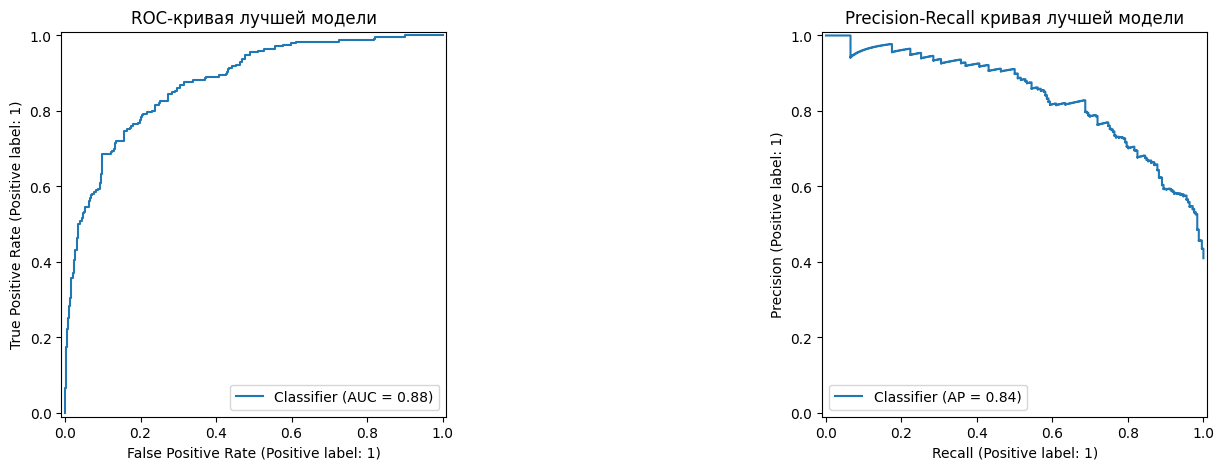

In [744]:
y_best_pred = best_model.predict(X_test)
y_best_proba = best_model.predict_proba(X_test)[:, 1]

fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))
RocCurveDisplay.from_predictions(y_test, y_best_proba, ax=ax1)
ax1.set_title("ROC-кривая лучшей модели")
PrecisionRecallDisplay.from_predictions(y_test, y_best_proba, ax=ax2)
ax2.set_title("Precision-Recall кривая лучшей модели")
plt.show()
fig.savefig("./figures/roc_pr_curve_best_model.png")

### 5. Сравнение бейзлайна и логистической регрессии

На тестовой выборке были рассчитаны метрики качества для двух моделей:
- бейзлайн-модели `DummyClassifier`;
- лучшей модели логистической регрессии (`LogReg (Pipeline)`).

Для каждой модели вычислялись:
- **Accuracy** — доля верных предсказаний;
- **Precision**, **Recall** и **F1-score** — метрики качества для положительного класса;
- **ROC-AUC** — способность модели различать классы независимо от порога классификации.

Все метрики собраны в единую таблицу для наглядного сравнения моделей на одних и тех же данных. Это позволяет корректно оценить прирост качества логистической регрессии относительно бейзлайна.

In [745]:
test_results = {"model": []}

models = [
    ("DummyClassifier", dummy),
    ("LogReg (Pipeline)", best_model),
]

for name, model in models:
    test_results["model"].append(name)

    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    test_results["Accuracy"] = test_results.get("Accuracy", []) + [accuracy_score(y_test, y_pred)]
    test_results["Precision"] = test_results.get("Precision", []) + [precision_score(y_test, y_pred, zero_division=0)]
    test_results["Recall"] = test_results.get("Recall", []) + [recall_score(y_test, y_pred, zero_division=0)]
    test_results["F1-score"] = test_results.get("F1-score", []) + [f1_score(y_test, y_pred, zero_division=0)]
    test_results["ROC-AUC"] = test_results.get("ROC-AUC", []) + [roc_auc_score(y_test, y_proba)]

test_results_df = pd.DataFrame(test_results)
display(test_results_df)

,model,Accuracy,Precision,Recall,F1-score,ROC-AUC
0,DummyClassifier,0.59,0.000000,0.000000,0.00000,0.50000
1,LogReg (Pipeline),0.80,0.794393,0.691057,0.73913,0.87566


Для лучшей модели логистической регрессии была построена **PR-кривая** и **матрица ошибок**.

PR-кривая (Precision–Recall) показывает зависимость между точностью и полнотой при изменении порога классификации и особенно информативна для задач с несбалансированным таргетом. Значение **Average Precision (AP)** отражает обобщённое качество модели по всей кривой.

Матрица ошибок позволяет наглядно оценить количество верных и неверных предсказаний по каждому классу, а также понять, какие типы ошибок модель совершает чаще.

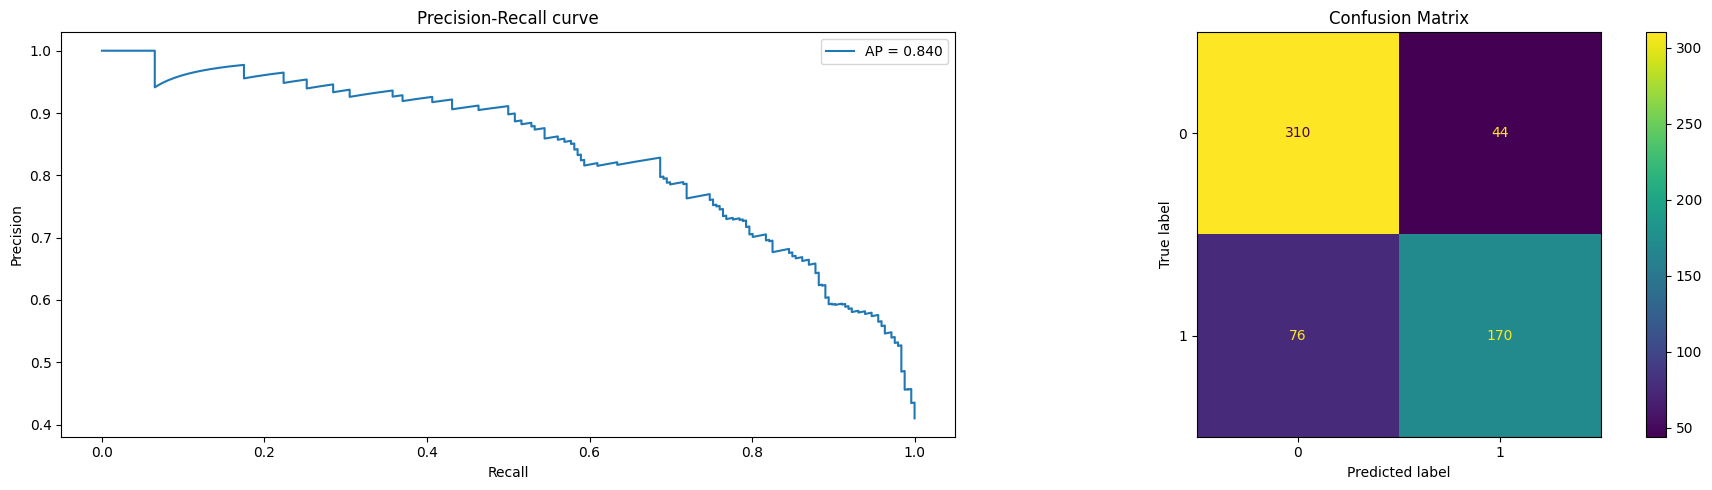

In [746]:
precision, recall, _ = precision_recall_curve(y_test, y_proba)
ap = average_precision_score(y_test, y_proba)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5))

# PR curve
ax1.plot(recall, precision, label=f"AP = {ap:.3f}")
ax1.set_xlabel("Recall")
ax1.set_ylabel("Precision")
ax1.set_title("Precision-Recall curve")
ax1.legend()

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_best_pred, ax=ax2)
ax2.set_title("Confusion Matrix")

plt.tight_layout()
plt.show()

fig.savefig("figures/pr_and_confusion_matrix.png", dpi=150, bbox_inches="tight")